In [1]:
import os
import numpy as np
import pandas as pd

from scipy import corrcoef
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn import cluster, metrics
import scipy.io

from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path
home_dir = str(Path.home())
work_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Aging Decision Making R01')

Atlas ROIs are located in nifti image (4D) at: /Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/Analysis/schaefer400/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.nii.gz


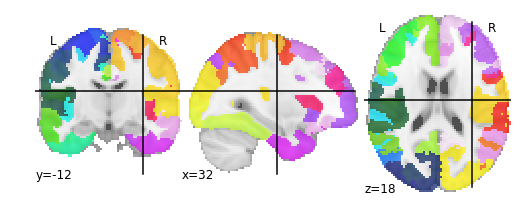

In [3]:
from nilearn import datasets
dataset = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=7, resolution_mm=2, data_dir=os.path.join(work_dir, 'Analysis/schaefer400'))
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' % atlas_filename)  # 4D data
plotting.plot_roi(atlas_filename)

In [4]:
schaefer_coords = np.loadtxt(os.path.join(work_dir, 'Analysis/schaefer400/Schaefer2018_400Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'), delimiter = ',', skiprows=2, usecols=(2,3,4))
schaefer_coords = tuple(map(tuple, schaefer_coords))
schaefer_coords[:5]

labels_df = pd.DataFrame(labels, columns = ['labels'], dtype=str)
dmn_mask = labels_df.index[labels_df['labels'].str.contains('Default')]

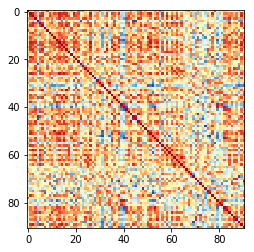

In [5]:
fcmat_dmn = scipy.io.loadmat(os.path.join(work_dir, 'Analysis/REST/REST_OA_dmn_cor.mat'), squeeze_me=True)['OA_dmn_cormat']

plt.imshow(fcmat_dmn[:,:,1], interpolation='None', cmap='RdYlBu_r')

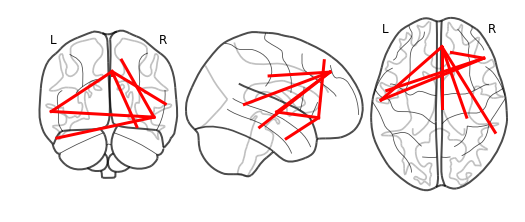

In [6]:
adj = np.loadtxt(os.path.join(work_dir, 'Analysis/REST/nbs_results/dmn_ef_adj.txt'))
plotting.plot_connectome(adj, np.asarray(schaefer_coords)[dmn_mask], node_size=0)

In [7]:
edgelist = np.where(np.triu(adj)==1)
edgelist

(array([19, 47, 47, 56, 69, 69, 70]), array([73, 69, 73, 69, 80, 86, 73]))

In [8]:
fcmat_dmn[edgelist[0], edgelist[1], 0]

array([ 0.56610183, -0.1681285 ,  0.24572394, -0.1776394 ,  0.2799803 ,
        0.30656014,  0.33380734])

In [9]:
range(0, np.ma.size(fcmat_dmn, 2))[:5]

range(0, 5)

In [10]:
cor = []

for subject in range(0, np.ma.size(fcmat_dmn, 2)):
    cor.append(fcmat_dmn[edgelist[0], edgelist[1], subject])

cor = np.asarray(cor)

In [11]:
ef = pd.read_csv(os.path.join(work_dir, 'Analysis/neuropsych/oa_neuropsych_zscores.csv'), usecols=['Executive function']).values

Text(0.07, 0.5, 'Executive Function')

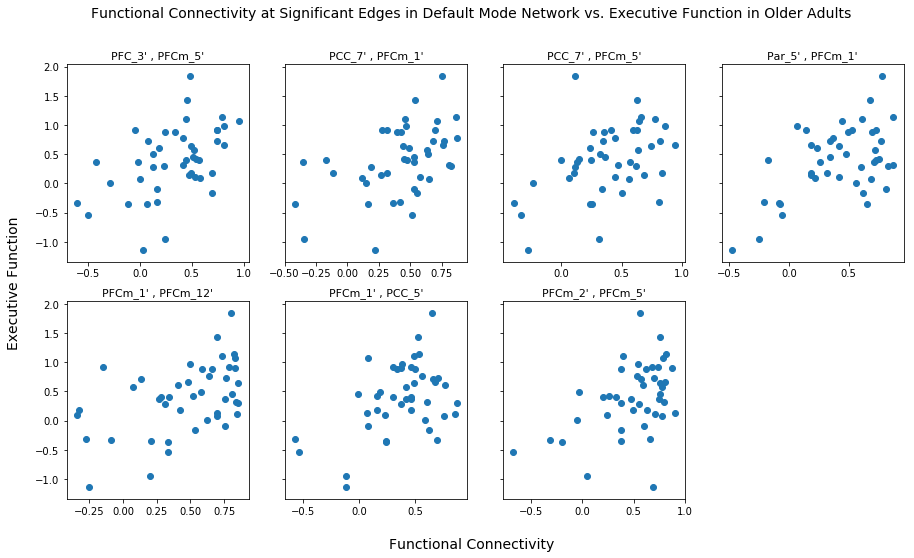

In [12]:
fig, axes = plt.subplots(2,4,figsize=[15,8], sharey=True)
fig.suptitle('Functional Connectivity at Significant Edges in Default Mode Network vs. Executive Function in Older Adults', size=14)

for edge in range(0,7):
    if edge <4:
        axes[0, edge].scatter(cor[:,edge], ef)
        axes[0, edge].set_title(str(labels[dmn_mask][edgelist[0][edge]])[23:] + ' , ' + str(labels[dmn_mask][edgelist[1][edge]])[23:], size=11)
    else:
        axes[1, edge-4].scatter(cor[:,edge], ef)
        axes[1, edge-4].set_title(str(labels[dmn_mask][edgelist[0][edge]])[23:] + ' , ' + str(labels[dmn_mask][edgelist[1][edge]])[23:], size=11)

fig.delaxes(axes[1][3])

fig.text(0.5, 0.04, 'Functional Connectivity', ha='center', size=14)
fig.text(0.07, 0.5, 'Executive Function', va='center', rotation='vertical', size=14)

# plt.gca().legend(loc='center left', bbox_to_anchor=(1.2, 0.9))


In [15]:
import statsmodels.api as sm
for edge in range(0,7):
    print('\n \n' + str(labels[dmn_mask][edgelist[0][edge]])[23:] + ' , ' + str(labels[dmn_mask][edgelist[1][edge]])[23:])
    mod = sm.OLS(cor[:,edge], ef)
    res = mod.fit()
    print(res.summary())


 
PFC_3' , PFCm_5'
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     35.81
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           3.86e-07
Time:                        18:23:22   Log-Likelihood:                -17.508
No. Observations:                  44   AIC:                             37.02
Df Residuals:                      43   BIC:                             38.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4664      0.078

In [20]:
cr = pd.read_csv(os.path.join(work_dir, 'Data/cr/cr_2019-06-20.csv'))
cr[:5]

,record_id,IS,IV,RA,L5,L5_starttime,M10,M10_starttime,L5_start_diff,M10_start_diff,...,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,rsqact,fact,fnlrgact
0,30008,0.45,0.62,0.90,7.64,2:27:00,145.23,7:58:00,2.450000,7.966667,...,15.490810,0.178702,0.943425,7.692236,23.289384,-0.453656,0.649881,0.404868,4897.316098,2354.052740
1,30009,0.30,1.27,0.90,12.15,1:02:00,240.94,10:31:00,1.033333,10.516667,...,14.627460,0.000000,0.947438,6.539411,22.715509,-0.519827,0.674004,0.381382,4438.077395,1197.963932
2,30012,0.34,1.18,0.94,7.73,1:34:30,245.98,9:26:30,1.575000,9.441667,...,15.219783,0.220009,1.054822,7.464044,22.975521,-0.443634,0.646312,0.435081,5541.536016,1984.367813
3,30015,0.36,1.57,0.94,6.04,23:32:00,197.96,10:52:00,23.533333,10.866667,...,14.087231,0.122241,0.909226,5.909579,22.264882,-0.539721,0.681471,0.410941,5022.021147,2486.503949
4,30019,0.45,0.77,0.92,5.73,2:41:30,146.39,11:36:30,2.691667,11.608333,...,16.649510,0.082186,0.873804,8.534739,24.764281,-0.525790,0.676231,0.365664,4149.725823,1594.546017


## To Do

1. Match record_ids for circadian rhythm and fc data
2. Look at relationships between circadian measures and edges related to EF